In [233]:
import numpy as np
import matplotlib.pyplot as plt 
F=np.array([0,.045,.391,.472,.484 ,.546,.511,.412,.352,.122,.088,.013])
#T=np.array([0.845,0.975 ,0.965, 0.950 ,0.926, 0.895, 0.850, 0.786, 0.691, 0.561 ,0.370])
T=np.array([.845,.975,.965,.95,.926,.895,.85,.786,.691,.561,.370])
#F=np.array([0,0.045,0.391,0.472, 0.484, 0.546, 0.511, 0.412, 0.352, 0.122, 0.088, 0.0])
x0=10*np.array([10,12,4,3,5,4,3,4,5,2,1,1])
N0=sum(x0)
N0

540

In [227]:
def Matrix(F,T):
    n=len(F)
    A=np.zeros((n,n))
    A[0,:]=F
    return A+np.diag(T,-1)
def norm1(u):
    return sum([abs(u[i]) for i in range(len(u))])
def R(F,T1,phi,indice):
    n=len(T1)
    T=T1.copy()
    T[indice]=T[indice]-phi*T[indice]
    m=F[-1]
    
    for i in range(n-1,-1,-1):
    
        m=F[i]+T[i]*m
    return m

 la valeur propre de A de module maxilam est 1.1605315456599434
le nombre des mouton apres 30 and est 41229.73957480221


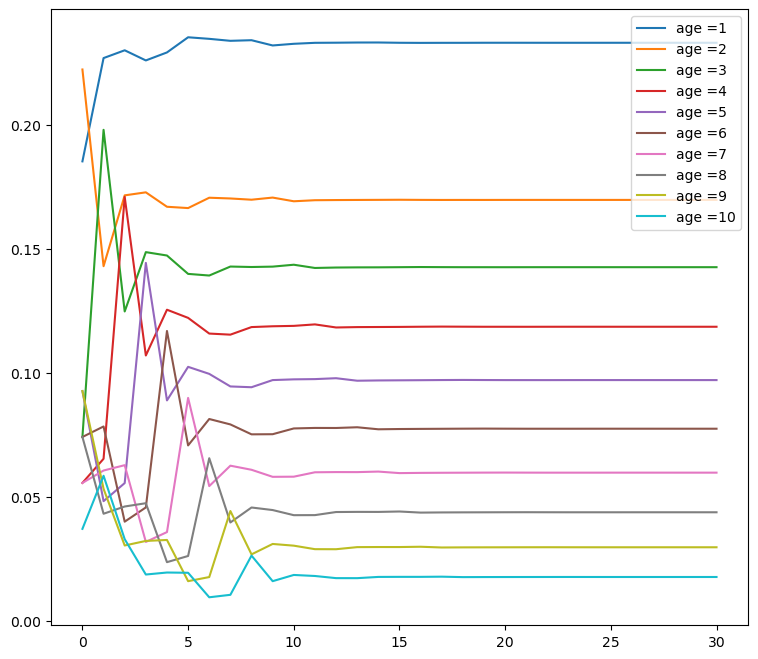

In [235]:
A=Matrix(F,T)
fig,ax=plt.subplots(1,1,figsize=(9,8))
L=[x0/norm1(x0)]
tabn=[norm1(x0)]
Lx=[x0]
for i in range(30):
    x=np.dot(A,Lx[-1])
    Lx.append(x)
    tabn.append(norm1(x))
    L.append(x/tabn[-1])
X,_=np.linalg.eig(A)
print(' la valeur propre de A de module maxilam est {}'.format(max(abs(X))))
print('le nombre des mouton apres 30 and est {}'.format(tabn[-1]))
L=np.array(L)
for i in range(10):
    ax.plot(L[:,i],label='age ='+str(i+1))
plt.legend()
plt.show()

0.15267599727084846

l' age optimal est 4 


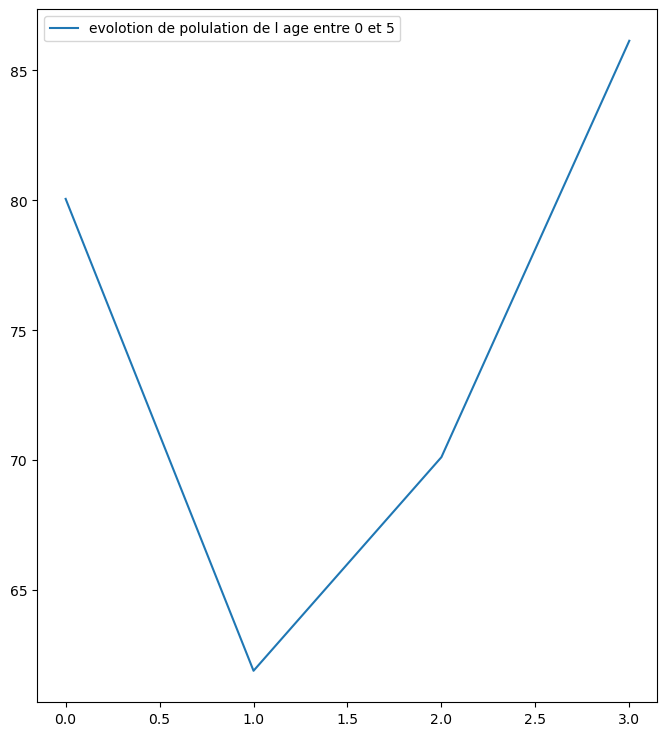

In [223]:
def dichotomi(f,a,b,eps=1e-7):
    while (b-a)>eps:
        centre=(a+b)/2
        if f(centre)*f(a)<=0:
            b=centre
        else:
            a=centre
    return (b+a)/2
phi_list=[]
popul=[]
for age in range(4):
    f=lambda x:R(F,T,x,age)-1
    phi=dichotomi(f,0,1)
    L=[x0]
    tabn=[norm1(x0)]
    L[-1]=L[-1]/tabn[-1]
    T_age=T.copy()
    T_age[age]=T_age[age]-phi*T_age[age]
    phi_list.append(phi)
    A=Matrix(F,T_age)
    for i in range(50):
        x=np.dot(A,L[-1])
        tabn.append(norm1(x))
        L.append(x/norm1(x))
    popul.append(L[-1][age])
tab=[popul[i]*phi_list[i] for i in range(len(popul))]   
mx=max(tab)
age_opt=tab.index(mx)
print('l\' age optimal est {} '.format(age_opt+1))
fig,ax=plt.subplots(1,1,figsize=(8,9))
ax.plot(norm1(x0)*np.array(tab),label='evolotion de polulation de l age entre 0 et 5')
plt.legend()
plt.show()

l' age optimal est 4 


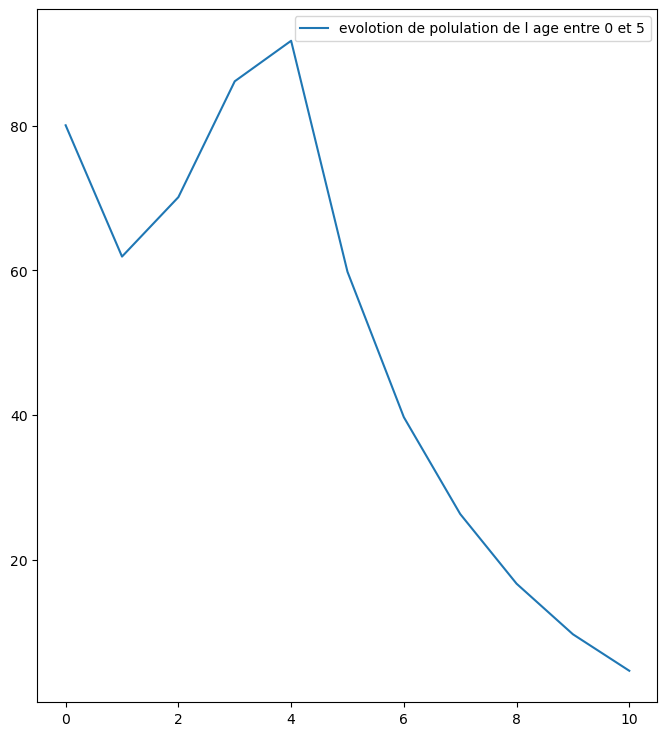

In [276]:
phi_list=[]
popul=[]
for age in range(len(x0)-1):
    f=lambda x:R(F,T,x,age)-1
    phi=dichotomi(f,0,1)
    L=[x0]
    tabn=[norm1(x0)]
    L[-1]=L[-1]/tabn[-1]
    T_age=T.copy()
    T_age[age]=T_age[age]-phi*T_age[age]
    phi_list.append(phi)
    A=Matrix(F,T_age)
    for i in range(50):
        x=np.dot(A,L[-1])
        tabn.append(norm1(x))
        L.append(x/norm1(x))
    popul.append(L[-1][age])
tab=[popul[i]*phi_list[i] for i in range(len(popul))]   
mx=max(tab)
age_opt=tab.index(mx)
print('l\' age optimal est {} '.format(age_opt))
fig,ax=plt.subplots(1,1,figsize=(8,9))
ax.plot(norm1(x0)*np.array(tab),label='evolotion de polulation de l age entre 0 et 5')
plt.legend()
plt.show()

l' age optimal est 3 


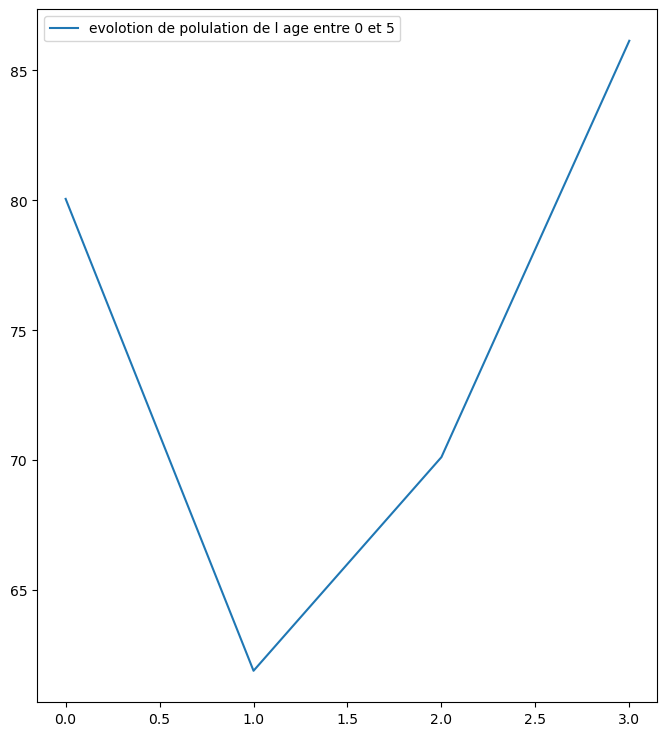

In [284]:
phi_list=[]
popul=[]
for age in range(4):
    f=lambda x:R(F,T,x,age)-1
    phi=dichotomi(f,0,1)
    L=[x0]
    tabn=[norm1(x0)]
    L[-1]=L[-1]/tabn[-1]
    T_age=T.copy()
    T_age[age]=T_age[age]-phi*T_age[age]
    phi_list.append(phi)
    A=Matrix(F,T_age)
    for i in range(50):
        x=np.dot(A,L[-1])
        tabn.append(norm1(x))
        L.append(x/norm1(x))
    popul.append(L[-1][age])
tab=[popul[i]*phi_list[i] for i in range(len(popul))]   
mx=max(tab)
age_opt=tab.index(mx)
print('l\' age optimal est {} '.format(age_opt))
fig,ax=plt.subplots(1,1,figsize=(8,9))
ax.plot(norm1(x0)*np.array(tab),label='evolotion de polulation de l age entre 0 et 5')
plt.legend()
plt.show()

 le nombre initiale des mouton est 540
 la valeur propre de A de module maxilam est 1.0613662650365412
le nombre des mouton apres 30 and est 2889.138414499802 apres abbatage


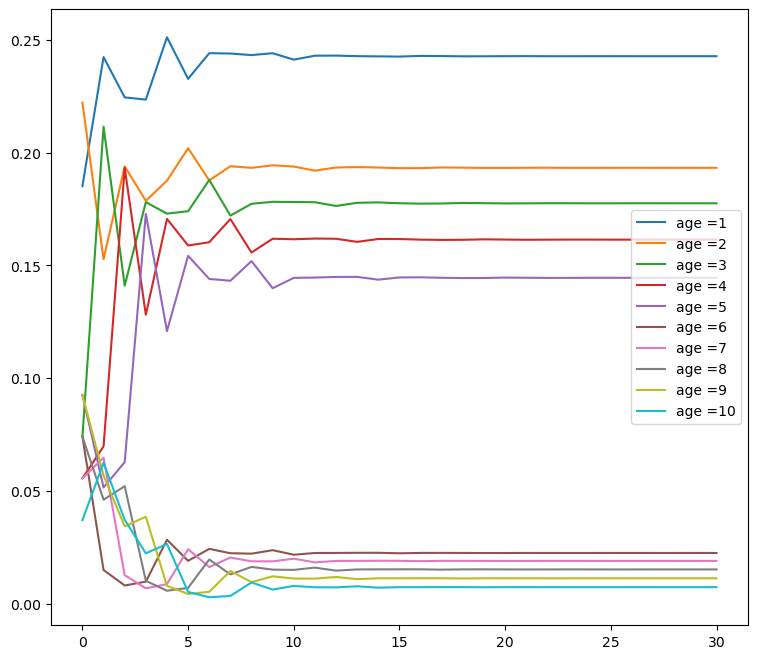

In [285]:
#stratigie d'abbatage

age=4
T_age=T.copy()
T_age[age]=T_age[age]-phi_list[-1]*T_age[age]
A=Matrix(F,T_age)
fig,ax=plt.subplots(1,1,figsize=(9,8))
L=[x0/norm1(x0)]
tabn=[norm1(x0)]
Lx=[x0]
for i in range(30):
    x=np.dot(A,Lx[-1])
    Lx.append(x)
    tabn.append(norm1(x))
    L.append(x/tabn[-1])
X,_=np.linalg.eig(A)
print(' le nombre initiale des mouton est {}'.format(norm1(x0)))
print(' la valeur propre de A de module maxilam est {}'.format(max(abs(X))))
print('le nombre des mouton apres 30 and est {} apres abbatage'.format(tabn[-1]))
L=np.array(L)
for i in range(10):
    ax.plot(L[:,i],label='age ='+str(i+1))
plt.legend()
plt.show()

 le nombre initiale des mouton est 540
 la valeur propre de A de module maxilam est 0.9999999953169036
le nombre des mouton apres 30 and est 540.425125120734 apres abbatage


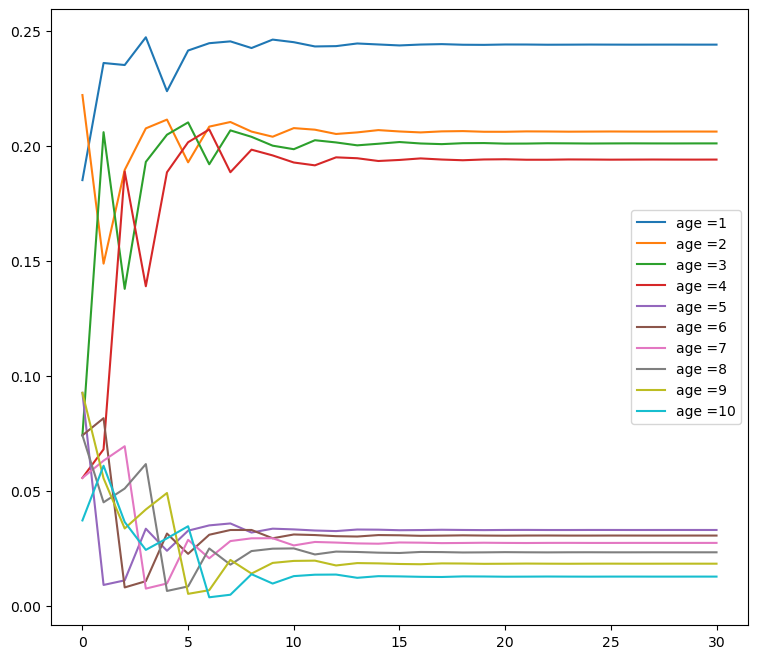

In [286]:
#stratigie d'abbatage
age=3
T_age=T.copy()
T_age[age]=T_age[age]-phi_list[-1]*T_age[age]
A=Matrix(F,T_age)
fig,ax=plt.subplots(1,1,figsize=(9,8))
L=[x0/norm1(x0)]
tabn=[norm1(x0)]
Lx=[x0]
for i in range(30):
    x=np.dot(A,Lx[-1])
    Lx.append(x)
    tabn.append(norm1(x))
    L.append(x/tabn[-1])
X,_=np.linalg.eig(A)
print(' le nombre initiale des mouton est {}'.format(norm1(x0)))
print(' la valeur propre de A de module maxilam est {}'.format(max(abs(X))))
print('le nombre des mouton apres 30 and est {} apres abbatage'.format(tabn[-1]))
L=np.array(L)
for i in range(10):
    ax.plot(L[:,i],label='age ='+str(i+1))
plt.legend()
plt.show()